# Exercise 1

In [39]:
import numpy as np
import pylab as plt
%matplotlib inline

## 1.1 data creation

Given the likelihoods, priors and the fact that the data desities sum up to one, one can derive the posteriors. The cumulative distributions (cdf) result from integrating the posteriors. To perform inverse sampling the cdfs are inverted and for each data point a cdf value is derived from a unifor distribution which is then used to find the corresponding feature.
Wheather the data point is to be of class zero or one is sampled from a uniform distribution with value 0.5.

In [168]:
def createData(N):
    #sampling a label and a cdf value
    classLabels = np.random.uniform(0, 1, N)
    cumulatives = np.random.uniform(0, 1, N)
    #initializing data points
    y = np.zeros(N)
    x = np.zeros(N)
    #deriving the feature for a randomly sampled label
    for i in range(N):
        if classLabels[i] > 0.5: #label is one
            y[i] = 1
            x[i] = np.sqrt(cumulatives[i])
        else: #y is zero and already initialized as such
            x[i] = 1 - np.sqrt(1 - cumulatives[i])
    return x, y

features, labels = createData(20)
#meanOfOnes = features[labels==1].mean()
#meanOfZeros = features[labels==0].mean()
#print(meanOfOnes)
#print(meanOfZeros)
#plt.scatter(features, labels)
#plt.show()

## 1.2 classification by thresholding

In [54]:
#function to classify an array of features according to the given rules
def classify(rule, threshold, features):
    classifications = np.zeros(len(features))
    for i in range(len(features)):
        if rule == 'A':
            if features[i] > threshold:
                classifications[i] = 1
        if rule == 'B':
            if features[i] <= threshold:
                classifications[i] = 1
    return classifications
        
#functino to determine the error rate of the classify function given an array of labels and one 
#containing the true labels
def errorRate(rule, threshold, features, labels):
    #classify data set according to rule
    classifications = classify(rule, threshold, features)
    #determine error
    mistakes = 0
    for i in range(len(features)):
        if labels[i] != classifications[i]:
            mistakes += 1
    return mistakes/len(features) 

In [158]:
#function to perform a classification experiment from generated data given a single threshold,
#the size of the data sets to be created and the number of repetitions.
#It returns the average error and standard deviation of the number of repetitions as well as the
#used threshold.
def experiment(threshold, size, repetitions, rule):
    errors = np.empty(repetitions)
    for rep in range(repetitions):
        #generate data
        features, labels = createData(size)
        errors[rep] = errorRate(rule, threshold, features, labels)
    meanErr = np.mean(errors)
    std = np.std(errors)
    return meanErr, std, threshold
    

#function to perform a series of experiments taking an array of thresholds, one of the sizes
#and the number of repetitions in each experiment as input. It returns a numpy array with
#dimensions threshold, size, experiments. Additionally it returns the innput array of thresholds
#and sizes as well as the used rule
def test(thresholds, sizes, repetitions, rule):
    experiments = np.empty((len(thresholds), len(sizes), 3))
    for i, t in enumerate(thresholds):
        for j, M in enumerate(sizes):
            meanErr, std, threshold = experiment(t, M, repetitions, rule)
            experiments[i, j, 0] = meanErr
            experiments[i, j, 1] = std
            experiments[i, j, 2] = t
    return experiments, thresholds, sizes, rule

In [159]:
#function to plot the evolution of the mean error's standard deviation as a function of data set
#size for each threshold in a series of experiments performed by the test function.
def plotStds(test):
    x = test[2]
    f, axes = plt.subplots(1, len(test[1]))
    for i in range(len(test[1])):
        y = []
        for j in range(len(test[2])):
            y.append(test[0][i, j, 1])
        axes[i].plot(x, y)
        axes[i].set_ylim([np.min(y), np.max(y)])
        axes[i].set_title(test[1][i])
    plt.tight_layout()
    plt.show()
    return    

In [183]:
#function to plot the mean error of a all experiemnts in a set generated by the test function.
#Different data set sizes are not explicitily marked. Next to the experimental errors the
#the theoretical expectacion is plotted (not a fit!)
def plotErr(test):
    thresholds = test[1]
    sizes = test[2]
    rule = test[3]
    errTheo = np.empty(100)
    t = np.linspace(0, 1, 100)
    errReal = []
    tReal = []
    for i in range(len(thresholds)):
        for j in range(len(test[2])):
            errReal.append(test[0][i, j, 0])
            tReal.append(test[0][i, j, 2])
    if rule == 'A':
        errTheo = 1/4 + (t - 1/2)**2
    else:
        errTheo = 3/4 - (t - 1/2)**2
    #print(errReal, tReal)
    plt.title('Rule ' + rule + ' errors')
    plt.xlabel('threshold')
    plt.ylabel('mean error rate')
    plt.plot(t, errTheo)
    plt.scatter(tReal, errReal)
    plt.show()
    return

### Rule A

The test results are also printed. Columns are: average error, error's standard deviation and threshold from left to right. Lines are size of test sets as in the input (first dimenstion) and thresholds (second dimension).

[[[ 0.401       0.03176476  0.1       ]
  [ 0.414       0.0143248   0.1       ]
  [ 0.40977     0.00489634  0.1       ]]

 [[ 0.253       0.03001666  0.3       ]
  [ 0.2913      0.01179873  0.3       ]
  [ 0.28985     0.00355956  0.3       ]]

 [[ 0.256       0.06216108  0.5       ]
  [ 0.2536      0.01154296  0.5       ]
  [ 0.2487      0.00311288  0.5       ]]

 [[ 0.289       0.03726929  0.7       ]
  [ 0.287       0.0121326   0.7       ]
  [ 0.28975     0.00304212  0.7       ]]

 [[ 0.414       0.04363485  0.9       ]
  [ 0.4027      0.01195031  0.9       ]
  [ 0.40865     0.00335894  0.9       ]]]


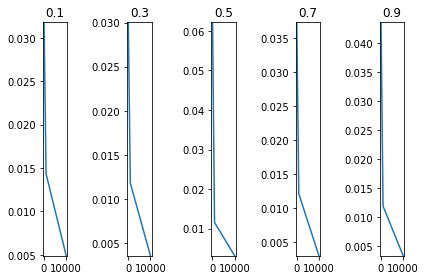

In [184]:
testA = test([0.1, 0.3, 0.5, 0.7, 0.9], [100, 1000, 10000], 10, 'A')
print(testA[0])
plotStds(testA)

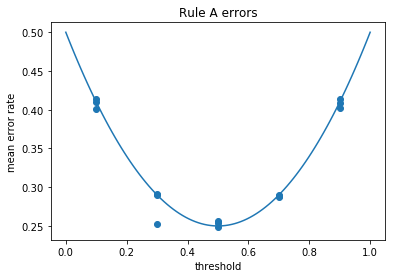

In [185]:
plotErr(testA)

### Rule B

[[[ 0.401       0.03176476  0.1       ]
  [ 0.414       0.0143248   0.1       ]
  [ 0.40977     0.00489634  0.1       ]]

 [[ 0.253       0.03001666  0.3       ]
  [ 0.2913      0.01179873  0.3       ]
  [ 0.28985     0.00355956  0.3       ]]

 [[ 0.256       0.06216108  0.5       ]
  [ 0.2536      0.01154296  0.5       ]
  [ 0.2487      0.00311288  0.5       ]]

 [[ 0.289       0.03726929  0.7       ]
  [ 0.287       0.0121326   0.7       ]
  [ 0.28975     0.00304212  0.7       ]]

 [[ 0.414       0.04363485  0.9       ]
  [ 0.4027      0.01195031  0.9       ]
  [ 0.40865     0.00335894  0.9       ]]]


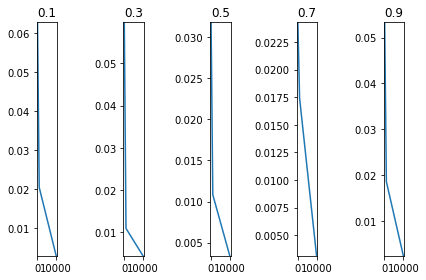

In [186]:
testB = test([0.1, 0.3, 0.5, 0.7, 0.9], [100, 1000, 10000], 10, 'B')
print(testA[0])
plotStds(testB)

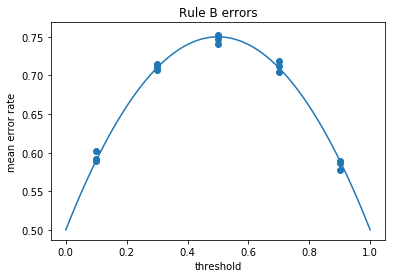

In [187]:
plotErr(testB)

## 1.3 NN Classifier

In [188]:
#function to a two instance (always one per class) training set by inverse sampling. 
def nnTS():
    y = np.array([0,1])
    cumulatives = np.random.uniform(0, 1, 2)
    x = np.array([1 - np.sqrt(1 - cumulatives[0]), np.sqrt(cumulatives[1])])
    return [x, y]
    
#function to classify the features given in varset according to the given trainset usnig a
#nearest neighbour classification
def nnClassify(varset, trainset):
    guesses = np.empty(len(varset[0]))
    for i in range(len(varset[0])):
        #measuring and comparing distances to the two training instances
        d0 = np.absolute(trainset[0][0] - varset[0][i])
        d1 = np.absolute(trainset[0][1] - varset[0][i])
        if d0 <= d1: guesses[i] = 0
        else: guesses[i] = 1
    return guesses

#function to determine the error rate of a classification using nnClassify given a data set's
#true labels and a classification
def nnErr(varset, guesses):
    mistakes = 0
    for i in range(len(varset[1])):
        if varset[1][i] != guesses[i]:
            mistakes += 1
    return mistakes/len(varset[1])

#function performing a given number of NN classifications and determining the average error rate
#given also the size of the data sets to be generated.
def testNNClassify(numberTS, varSetSize):
    errors = np.empty(numberTS)
    varSet = createData(varSetSize)
    for i in range(numberTS):
        TS = nnTS()
        guesses = nnClassify(varSet, TS)
        errors[i] = nnErr(varSet, guesses)
    return np.mean(errors)

print('Average NN classification error:', testNNClassify(100, 10000))

Average NN classification error: 0.365426
